<a href="https://colab.research.google.com/github/thomaskotitsas/my-training/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#εγκατάσταση πακέτου PyOD (https://pyod.readthedocs.io/en/latest/)
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=1ebdd97de6a85ddd383c40b009396ebfae52c28930684515488d814b11cabf9b
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


In [2]:
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pyod.models.iforest import IForest
import matplotlib.pyplot as plt

In [3]:
#εισαγωγή του συνόλου δεδομένων
network_data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/DarkNet.csv', delimiter=',')

<ipython-input-3-4fb33df0a72e>:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  network_data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/DarkNet.csv', delimiter=',')


In [13]:
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pyod.models.iforest import IForest
import matplotlib.pyplot as plt

# Add this line to import the NumPy library
import numpy as np

#κλιμάκωση δεδομένων
scaler = StandardScaler()
X = network_data.select_dtypes(include=['number']) # Select only numerical columns

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
X.dropna(inplace=True)

X_scaled = scaler.fit_transform(X)

In [14]:
#χρήση αλγορίθμου Isolation Forest
model = IForest(contamination=0.02, random_state=42)
model.fit(X_scaled)

IForest(behaviour='old', bootstrap=False, contamination=0.02,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=1,
    random_state=42, verbose=0)

In [15]:
#πρόβλεψη βαθμού ανωμαλίας (anomaly score)
anomaly_scores = model.decision_function(X_scaled)

In [17]:
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pyod.models.iforest import IForest
import matplotlib.pyplot as plt

# Add this line to import the NumPy library
import numpy as np

#κλιμάκωση δεδομένων
scaler = StandardScaler()
X = network_data.select_dtypes(include=['number']) # Select only numerical columns

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
X.dropna(inplace=True)

X_scaled = scaler.fit_transform(X)

#χρήση αλγορίθμου Isolation Forest
model = IForest(contamination=0.02, random_state=42)
model.fit(X_scaled)

#πρόβλεψη βαθμού ανωμαλίας (anomaly score)
anomaly_scores = model.decision_function(X_scaled)

# Create a new DataFrame with the anomaly scores and the original index
anomaly_df = pd.DataFrame({'anomaly_score': anomaly_scores}, index=X.index)

# Join the anomaly scores with the original DataFrame
network_data = network_data.join(anomaly_df)

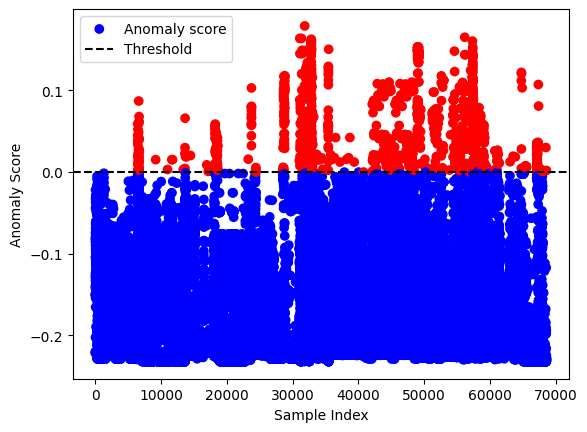

In [19]:
#οπτικοποίηση αποτελεσμάτων, με μπλε οι τιμές που θεωρούνται κανονικές και με κόκκινο όσες καταγράφονται ως ανωμαλίες
colors = ['blue' if score <= model.threshold_ else 'red' for score in anomaly_scores]

# Use the index from X (which has the same size as anomaly_scores)
plt.scatter(X.index, anomaly_scores, c=colors, label='Anomaly score')
plt.axhline(y=model.threshold_, color='black', linestyle='--', label='Threshold')
plt.xlabel('Sample Index')
plt.ylabel('Anomaly Score')
plt.legend()

In [20]:
#τύπωση των τιμών που εντοπίσθηκαν ως ανωμαλίες
anomalies = network_data[network_data['anomaly_score'] > model.threshold_]
print("Detected Anomalies:")
print(anomalies)

Detected Anomalies:
               Src_IP  Src_Port          Dst_IP  Dst_Port  Protocol  \
6431        10.0.2.15     48847  195.154.107.23       443         6   
6435        10.0.2.15     48847  195.154.107.23       443         6   
6436        10.0.2.15     48847  195.154.107.23       443         6   
6440        10.0.2.15     48847  195.154.107.23       443         6   
6453        10.0.2.15     55482  195.154.82.180       443         6   
...               ...       ...             ...       ...       ...   
68021  80.239.235.110     11666      10.8.8.246     60245        17   
68026  80.239.235.110     11666      10.8.8.246     60245        17   
68031  80.239.235.110     11666      10.8.8.246     60245        17   
68508      10.8.8.246       138      10.8.8.247       138        17   
68579  80.239.235.110     11666      10.8.8.246     60245        17   

       Flow_Duration  Total_Fwd_Packet  Total_Bwd_packets  \
6431       119999286              8151              13549   
6435 